# Evaluación 1 - Introducción a Ciencia de Datos Espaciales

Estudiante: Pierina Milla

## 1. Merge de las 3 fuentes seleccionadas

Importo la librería Pandas y leo los 3 archivos con la data que han sido subidos al repositorio Github.
  1. Emisiones de CO2 sin LULUCF
       - Unidad: Kilotones
       - Fuente: United Nations Framework Convention on Climate Change
       - Años: 1990,2000,2020
  2. Precipitation
       - Unidad: Milímetros
       - Fuente: World Metereological Organization
       - Periodo: 1958-1990 
  3. Solar electricity
       - Unidad: millones Kilowatt-hora
       - Fuente: United Nations Statistics Division
       - Año: 2020

In [13]:
import pandas as pd

co2Link='https://github.com/IntroSpatialDataScience/ClimateChangeData/raw/main/data/CO2_emission.csv'
precipitationLink = 'https://github.com/IntroSpatialDataScience/ClimateChangeData/raw/main/data/precipitation_mean.csv'
solarElectricityLink = 'https://github.com/IntroSpatialDataScience/ClimateChangeData/raw/main/data/solar_electricity.csv'
co2=pd.read_csv(co2Link)
precipitation=pd.read_csv(precipitationLink)
solar = pd.read_csv(solarElectricityLink)

Realizo una copia de cada dataframe para trabajar sin modificar el archivo original

In [14]:
co2_new=co2.copy()
precipitation_new=precipitation.copy()
solar_new=solar.copy()

Cambio los nombres de las columnas referentes al territorio o país de cada DF para facilitar el merge entre ellos.

In [15]:
co2_new.rename(columns={'Country or Area':'Country'}, inplace=True)
precipitation_new.rename(columns={'Country or Territory':'Country'}, inplace=True)
solar_new.rename(columns={'Country or Area':'Country'}, inplace=True)

Ahora, separo las palabras separadas por coma en diferentes columnas. 

El número de filas y columnas de cada dataframe es:

In [16]:
co2_new.shape,precipitation_new.shape,solar_new.shape

((129, 3), (4263, 33), (244, 6))

In [17]:
co2_new.columns,precipitation_new.columns,solar_new.columns

(Index(['Country', 'Year', 'Value'], dtype='object'),
 Index(['Country', 'Station Name', 'Period', 'Statistic Description', 'Unit',
        'Jan', 'Jan Footnotes', 'Feb', 'Feb Footnotes', 'Mar', 'Mar Footnotes',
        'Apr', 'Apr Footnotes', 'May', 'May Footnotes', 'Jun', 'Jun Footnotes',
        'Jul', 'Jul Footnotes', 'Aug', 'Aug Footnotes', 'Sep', 'Sep Footnotes',
        'Oct', 'Oct Footnotes', 'Nov', 'Nov Footnotes', 'Dec', 'Dec Footnotes',
        'Annual', 'Annual Footnotes', 'Annual NCDC Computed Value',
        'Annual NCDC Computed Value Footnotes'],
       dtype='object'),
 Index(['Country', 'Commodity - Transaction', 'Year', 'Unit', 'Quantity',
        'Quantity Footnotes'],
       dtype='object'))

#### Fuzzy Merge

In [18]:
#Países que se encuentran solo en CO2 dataframe y no en solarDataframe
OnlyCO2_1=set(co2_new.Country)-set(solar_new.Country)
OnlyCO2_1

{'European Union', 'Iceland', 'Monaco', 'United States of America'}

In [19]:
#Países que se encuentran solo en solar dataframe y no en CO2 dataframe
OnlySolar_1=set(solar_new.Country)-set(co2_new.Country)
OnlySolar_1

{'1',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plur. State of)',
 'Bonaire, St Eustatius, Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Rep.',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Cuba',
 'Curaçao',
 "Côte d'Ivoire",
 'Dem. Rep. of the Congo',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Faeroe Islands',
 'Falkland Is. (Malvinas)',
 'Fiji',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras'

In [20]:
from thefuzz import process as fz

# Tomamos un pais de OnlySolar
# Miramos en un país de OnlyCO2 y retornamos el más similar
[(f,fz.extractOne(f, OnlySolar_1)) for f in sorted(OnlyCO2_1)]

[('European Union', ('Benin', 60)),
 ('Iceland', ('Thailand', 67)),
 ('Monaco', ('Morocco', 62)),
 ('United States of America', ('United States', 90))]

Selecciono los mejores matches:

In [21]:
match_CO2_Solar = [(f,fz.extractOne(f, OnlySolar_1)) for f in sorted(OnlyCO2_1)
 if fz.extractOne(f, OnlySolar_1)[1]>=87]
match_CO2_Solar= {f:fz.extractOne(f, OnlySolar_1)[0] 
                 for f in sorted(OnlyCO2_1)
                 if fz.extractOne(f, OnlySolar_1)[1] >=87}
match_CO2_Solar

{'United States of America': 'United States'}

In [22]:
#OnlyCO2_2=set(co2_new.Country)-set(precipitation_new.Country)
#OnlyCO2_2

In [23]:
#OnlyPrep_2=set(precipitation_new.Country)-set(co2_new.Country)
#OnlyPrep_2

In [24]:
#match_Prep_CO2 = [(f,fz.extractOne(f, OnlyPrep_2)) for f in sorted(OnlyCO2_2) if fz.extractOne(f, OnlyPrep_2)[1]>=87]
#match_Prep_CO2 = {f:fz.extractOne(f, OnlyPrep_2)[0] 
#                for f in sorted(OnlyCO2_2)
#                 if fz.extractOne(f, OnlyPrep_2)[1] >=87}
#match_Prep_CO2

In [25]:
#OnlySolar_3=set(solar_new.Country)-set(precipitation_new.Country)
#OnlySolar_3

In [26]:
#OnlyPrep_3=set(precipitation_new.Country)-set(solar_new.Country)
#OnlyPrep_3

In [27]:
#[(f,fz.extractOne(f, OnlyPrep_3)) for f in sorted(OnlySolar_3)]

In [28]:
#match_Prep_Solar = [(f,fz.extractOne(f, OnlyPrep_3)) for f in sorted(OnlySolar_3)
# if fz.extractOne(f, OnlyPrep_3)[1]>=87]
#match_Prep_Solar = {f:fz.extractOne(f, OnlyPrep_3)[0] 
#                 for f in sorted(OnlySolar_3)
#                 if fz.extractOne(f, OnlyPrep_3)[1] >=87}
#match_Prep_Solar

Reemplazo los nuevos nombres en el dataframe de CO2

In [29]:
co2_new.Country.replace(to_replace=match_CO2_Solar,inplace=True)
co2_new

,Country,Year,Value
0,Australia,2020,4.003335e+05
1,Australia,2000,3.496355e+05
2,Australia,1990,2.781542e+05
3,Austria,2020,6.203745e+04
4,Austria,2000,6.614978e+04
...,...,...,...
124,United Kingdom,2000,5.697442e+05
125,United Kingdom,1990,6.026521e+05
126,United States,2020,4.715691e+06
127,United States,2000,6.016351e+06


Merge entre dataframe de CO2 y SolarEnergy manteniendo lo que es común en ambas columnas

In [30]:
co2_solar = co2_new.merge(solar_new,how='inner',left_on='Country',right_on='Country')
co2_solar

,Country,Year_x,Value,Commodity - Transaction,Year_y,Unit,Quantity,Quantity Footnotes
0,Australia,2020,4.003335e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN
1,Australia,2020,4.003335e+05,Electricity - total solar production,2000.0,"Kilowatt-hours, million",38.000,NaN
2,Australia,2000,3.496355e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN
3,Australia,2000,3.496355e+05,Electricity - total solar production,2000.0,"Kilowatt-hours, million",38.000,NaN
4,Australia,1990,2.781542e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN
...,...,...,...,...,...,...,...,...
184,United States,2000,6.016351e+06,Electricity - total solar production,2000.0,"Kilowatt-hours, million",709.000,NaN
185,United States,2000,6.016351e+06,Electricity - total solar production,1990.0,"Kilowatt-hours, million",666.000,NaN
186,United States,1990,5.122496e+06,Electricity - total solar production,2020.0,"Kilowatt-hours, million",119328.543,NaN
187,United States,1990,5.122496e+06,Electricity - total solar production,2000.0,"Kilowatt-hours, million",709.000,NaN


Merge entre el resultado anterior y Precipitacion manteniendo lo que es común en ambas columnas

In [31]:
OnlyCO2_Solar=set(co2_solar.Country)-set(precipitation_new.Country)
OnlyCO2_Solar

{'Australia',
 'Austria',
 'Belarus',
 'Belgium',
 'Bulgaria',
 'Canada',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Japan',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Türkiye',
 'Ukraine',
 'United Kingdom',
 'United States'}

In [32]:
OnlyPrep=set(precipitation_new.Country)-set(co2_solar.Country)
OnlyPrep

{'1',
 '2',
 '3',
 'AFGHANISTAN, ISLAMIC STATE OF',
 'ALBANIA',
 'ALGERIA',
 'ARGENTINA',
 'ARGENTINA (ANTARCTIC STATIONS)',
 'ARMENIA',
 'AUSTRALIA',
 'AUSTRALIA (ANTARCTIC STATIONS)',
 'AUSTRIA',
 'AZERBAIJAN',
 'BAHAMAS',
 'BAHRAIN',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BENIN',
 'BOSNIA AND HERZEGOVINA',
 'BRAZIL',
 'BRUNEI DARUSSALAM',
 'BULGARIA',
 'CAMEROON',
 'CANADA',
 'CAPE VERDE',
 'CHAD',
 'CHILE',
 'CHILE (ANTARCTIC STATIONS)',
 'CHINA',
 'COLOMBIA',
 'COLOMBIA (SAN ANDRES AND PROVIDENCIA ISLANDS)',
 'COSTA RICA',
 'CROATIA',
 'CUBA',
 'CYPRUS',
 'CZECH REPUBLIC',
 'DENMARK',
 'DJIBOUTI',
 'DOMINICA',
 'DOMINICAN REPUBLIC',
 'ECUADOR',
 'EGYPT',
 'EL SALVADOR',
 'ERITREA',
 'ESTONIA',
 'FIJI',
 'FINLAND',
 'FRANCE',
 'FRANCE (CARIBBEAN ISLANDS, GUADELOUPE, MARTINIQUE)',
 'FRANCE (FRENCH DEPARTMENT OF GUYANA)',
 'FRANCE (ISLANDS IN THE INDIAN OCEAN)',
 'FRENCH POLYNESIA',
 'GABON',
 'GEORGIA',
 'GERMANY',
 'GREECE',
 'GREENLAND',
 'GUINEA',
 'GUYANA',
 'HONDURAS',
 'HONG KON

In [33]:
[(f,fz.extractOne(f, OnlyCO2_Solar)) for f in sorted(OnlyPrep)]

[('1', ('Latvia', 0)),
 ('2', ('Latvia', 0)),
 ('3', ('Latvia', 0)),
 ('AFGHANISTAN, ISLAMIC STATE OF', ('Spain', 54)),
 ('ALBANIA', ('Lithuania', 62)),
 ('ALGERIA', ('Bulgaria', 67)),
 ('ARGENTINA', ('Latvia', 54)),
 ('ARGENTINA (ANTARCTIC STATIONS)', ('Malta', 57)),
 ('ARMENIA', ('Romania', 71)),
 ('AUSTRALIA', ('Australia', 100)),
 ('AUSTRALIA (ANTARCTIC STATIONS)', ('Australia', 90)),
 ('AUSTRIA', ('Austria', 100)),
 ('AZERBAIJAN', ('Japan', 68)),
 ('BAHAMAS', ('Canada', 46)),
 ('BAHRAIN', ('Ukraine', 57)),
 ('BELARUS', ('Belarus', 100)),
 ('BELGIUM', ('Belgium', 100)),
 ('BELIZE', ('Belgium', 62)),
 ('BENIN', ('Liechtenstein', 68)),
 ('BOSNIA AND HERZEGOVINA', ('Poland', 57)),
 ('BRAZIL', ('Australia', 49)),
 ('BRUNEI DARUSSALAM', ('Australia', 60)),
 ('BULGARIA', ('Bulgaria', 100)),
 ('CAMEROON', ('Russian Federation', 48)),
 ('CANADA', ('Canada', 100)),
 ('CAPE VERDE', ('Sweden', 54)),
 ('CHAD', ('Czechia', 68)),
 ('CHILE', ('Liechtenstein', 54)),
 ('CHILE (ANTARCTIC STATIONS)',

In [34]:
match_CO2_Solar_Prep = [(f,fz.extractOne(f, OnlyCO2_Solar)) for f in sorted(OnlyPrep)
 if fz.extractOne(f, OnlyCO2_Solar)[1]>=87]
match_CO2_Solar_Prep

[('AUSTRALIA', ('Australia', 100)),
 ('AUSTRALIA (ANTARCTIC STATIONS)', ('Australia', 90)),
 ('AUSTRIA', ('Austria', 100)),
 ('BELARUS', ('Belarus', 100)),
 ('BELGIUM', ('Belgium', 100)),
 ('BULGARIA', ('Bulgaria', 100)),
 ('CANADA', ('Canada', 100)),
 ('CROATIA', ('Croatia', 100)),
 ('CYPRUS', ('Cyprus', 100)),
 ('DENMARK', ('Denmark', 100)),
 ('ESTONIA', ('Estonia', 100)),
 ('FINLAND', ('Finland', 100)),
 ('FRANCE', ('France', 100)),
 ('FRANCE (FRENCH DEPARTMENT OF GUYANA)', ('France', 90)),
 ('FRANCE (ISLANDS IN THE INDIAN OCEAN)', ('France', 90)),
 ('GERMANY', ('Germany', 100)),
 ('GREECE', ('Greece', 100)),
 ('HUNGARY', ('Hungary', 100)),
 ('IRELAND', ('Ireland', 100)),
 ('ITALY', ('Italy', 100)),
 ('JAPAN', ('Japan', 100)),
 ('LATVIA', ('Latvia', 100)),
 ('LITHUANIA', ('Lithuania', 100)),
 ('LUXEMBOURG', ('Luxembourg', 100)),
 ('MALTA', ('Malta', 100)),
 ('NETHERLANDS', ('Netherlands', 100)),
 ('NETHERLANDS ANTILLES AND ARUBA', ('Netherlands', 90)),
 ('NEW ZEALAND', ('New Zealand

In [35]:
match_CO2_Solar_Prep= {f:fz.extractOne(f, OnlyCO2_Solar)[0] 
                 for f in sorted(OnlyPrep)
                 if fz.extractOne(f, OnlyCO2_Solar)[1] >=87}
match_CO2_Solar_Prep

{'AUSTRALIA': 'Australia',
 'AUSTRALIA (ANTARCTIC STATIONS)': 'Australia',
 'AUSTRIA': 'Austria',
 'BELARUS': 'Belarus',
 'BELGIUM': 'Belgium',
 'BULGARIA': 'Bulgaria',
 'CANADA': 'Canada',
 'CROATIA': 'Croatia',
 'CYPRUS': 'Cyprus',
 'DENMARK': 'Denmark',
 'ESTONIA': 'Estonia',
 'FINLAND': 'Finland',
 'FRANCE': 'France',
 'FRANCE (FRENCH DEPARTMENT OF GUYANA)': 'France',
 'FRANCE (ISLANDS IN THE INDIAN OCEAN)': 'France',
 'GERMANY': 'Germany',
 'GREECE': 'Greece',
 'HUNGARY': 'Hungary',
 'IRELAND': 'Ireland',
 'ITALY': 'Italy',
 'JAPAN': 'Japan',
 'LATVIA': 'Latvia',
 'LITHUANIA': 'Lithuania',
 'LUXEMBOURG': 'Luxembourg',
 'MALTA': 'Malta',
 'NETHERLANDS': 'Netherlands',
 'NETHERLANDS ANTILLES AND ARUBA': 'Netherlands',
 'NEW ZEALAND': 'New Zealand',
 'NORWAY': 'Norway',
 'OMAN': 'Romania',
 'POLAND': 'Poland',
 'PORTUGAL': 'Portugal',
 'PORTUGAL (MADEIRA)': 'Portugal',
 'ROMANIA': 'Romania',
 'RUSSIAN FEDERATION (ASIA)': 'Russian Federation',
 'RUSSIAN FEDERATION (EUROPE)': 'Russian 

In [36]:
precipitation_new.Country.replace(to_replace=match_CO2_Solar_Prep,inplace=True)
precipitation_new

,Country,Station Name,Period,Statistic Description,Unit,Jan,Jan Footnotes,Feb,Feb Footnotes,Mar,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
0,"AFGHANISTAN, ISLAMIC STATE OF",Faiz abad,1961-1983,Mean Monthly Value,mm,49.4,NaN,65.0,NaN,91.9,...,23.4,NaN,29.7,NaN,34.1,NaN,40.4,NaN,484.9,NaN
1,"AFGHANISTAN, ISLAMIC STATE OF",Sheberghan,1959-1983,Mean Monthly Value,mm,42.3,NaN,44.3,NaN,56.4,...,6.6,NaN,13.6,NaN,29.8,NaN,19.2,NaN,230.5,NaN
2,"AFGHANISTAN, ISLAMIC STATE OF",Mazar-i-Sharif,1958-1983,Mean Monthly Value,mm,28.9,NaN,34.8,NaN,43.8,...,3.9,NaN,13.5,NaN,21.7,NaN,15.5,NaN,186.4,NaN
3,"AFGHANISTAN, ISLAMIC STATE OF",Kunduz,1968-1983,Mean Monthly Value,mm,44.0,NaN,56.5,NaN,76.7,...,7.3,NaN,23.7,NaN,28.4,NaN,26.8,NaN,322.6,NaN
4,"AFGHANISTAN, ISLAMIC STATE OF",Maimana,1964-1983,Mean Monthly Value,mm,49.9,NaN,60.5,NaN,82.2,...,9.6,NaN,20.9,NaN,44.7,NaN,29.6,NaN,355.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,ZIMBABWE,Beitbridge,1961-1990,Mean Monthly Value,mm,56.8,NaN,54.8,NaN,34.1,...,28.4,NaN,48.7,NaN,53.7,NaN,332.0,NaN,332.0,NaN
4259,footnoteSeqID,Footnote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4260,1,code for missing value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,2,"trace value for precipitation, rainfall, snowfall",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
co2_solar_prep = co2_solar.merge(precipitation_new,how='inner',left_on='Country',right_on='Country')
co2_solar_prep

,Country,Year_x,Value,Commodity - Transaction,Year_y,Unit_x,Quantity,Quantity Footnotes,Station Name,Period,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
0,Australia,2020,4.003335e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ALBANY (ALBANY TOWN),1961-1965,...,96.0,NaN,37.9,NaN,23.0,NaN,-9999.9,1.0,1012.3,NaN
1,Australia,2020,4.003335e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ESPERANCE (ESPERANCE POST OFFICE),1961-1969,...,51.3,NaN,19.3,NaN,17.9,NaN,-9999.9,1.0,698.8,NaN
2,Australia,2020,4.003335e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,TENNANT CRK POST OFFICE WAS 014050,1961-1970,...,14.3,NaN,11.8,NaN,40.6,NaN,-9999.9,1.0,321.3,NaN
3,Australia,2020,4.003335e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,LONGREACH POST OFFICE,1961-1973,...,19.6,NaN,22.3,NaN,84.1,NaN,-9999.9,1.0,433.7,NaN
4,Australia,2020,4.003335e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ESSENDON AIRPORT AMO,1961-1972,...,51.5,NaN,42.7,NaN,57.5,NaN,-9999.9,1.0,594.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15508,United States,1990,5.122496e+06,Electricity - total solar production,1990.0,"Kilowatt-hours, million",666.000,NaN,"POHNPEI, PI",1961-1990,...,424.4,NaN,399.8,NaN,386.6,NaN,4769.1,NaN,4769.1,NaN
15509,United States,1990,5.122496e+06,Electricity - total solar production,1990.0,"Kilowatt-hours, million",666.000,NaN,"KWAJALEIN ISLAND, PI",1961-1990,...,302.5,NaN,270.8,NaN,205.7,NaN,2593.0,NaN,2593.0,NaN
15510,United States,1990,5.122496e+06,Electricity - total solar production,1990.0,"Kilowatt-hours, million",666.000,NaN,"MAJURO, PI",1961-1990,...,351.5,NaN,325.1,NaN,301.0,NaN,3336.0,NaN,3336.0,NaN
15511,United States,1990,5.122496e+06,Electricity - total solar production,1990.0,"Kilowatt-hours, million",666.000,NaN,KOROR/W CAROLINE ISLANDS PI,1961-1990,...,352.3,NaN,287.5,NaN,304.3,NaN,3758.3,NaN,3758.3,NaN


A todo este resultado le asigno un nuevo nombre y es el que será modificado.

In [38]:
DF = co2_solar_prep.copy()
DF.head()

,Country,Year_x,Value,Commodity - Transaction,Year_y,Unit_x,Quantity,Quantity Footnotes,Station Name,Period,...,Oct,Oct Footnotes,Nov,Nov Footnotes,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes
0,Australia,2020,400333.4666,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ALBANY (ALBANY TOWN),1961-1965,...,96.0,NaN,37.9,NaN,23.0,NaN,-9999.9,1.0,1012.3,NaN
1,Australia,2020,400333.4666,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ESPERANCE (ESPERANCE POST OFFICE),1961-1969,...,51.3,NaN,19.3,NaN,17.9,NaN,-9999.9,1.0,698.8,NaN
2,Australia,2020,400333.4666,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,TENNANT CRK POST OFFICE WAS 014050,1961-1970,...,14.3,NaN,11.8,NaN,40.6,NaN,-9999.9,1.0,321.3,NaN
3,Australia,2020,400333.4666,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,LONGREACH POST OFFICE,1961-1973,...,19.6,NaN,22.3,NaN,84.1,NaN,-9999.9,1.0,433.7,NaN
4,Australia,2020,400333.4666,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ESSENDON AIRPORT AMO,1961-1972,...,51.5,NaN,42.7,NaN,57.5,NaN,-9999.9,1.0,594.9,NaN


## 2. Merge con el archivo adjunto

El archivo adjuntado en Paideia PUCP fue subido al repositorio de Github

In [39]:
country_isosLink = 'https://github.com/IntroSpatialDataScience/ClimateChangeData/raw/main/data/country_isos.xlsx'
country_Isos = pd.read_excel(country_isosLink)

In [40]:
country_Isos

,Country,Officialstatename,InternetccTLD,iso2,iso3
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG
1,ALBANIA,The Republic of Albania,.al,AL,ALB
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA
3,ANGOLA,The Republic of Angola,.ao,AO,AGO
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG
...,...,...,...,...,...
166,UZBEKISTAN,The Republic of Uzbekistan,.uz,UZ,UZB
167,VIET NAM,The Socialist Republic of Viet Nam,.vn,VN,VNM
168,YEMEN,The Republic of Yemen,.ye,YE,YEM
169,ZAMBIA,The Republic of Zambia,.zm,ZM,ZMB


In [41]:
OnlyDF=set(DF.Country)-set(country_Isos.Country)
OnlyDF

{'Australia',
 'Austria',
 'Belarus',
 'Belgium',
 'Bulgaria',
 'Canada',
 'Croatia',
 'Cyprus',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Japan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Russian Federation',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Ukraine',
 'United Kingdom',
 'United States'}

In [42]:
OnlyIsos=set(country_Isos.Country)-set(DF.Country)
OnlyIsos

{'AFGHANISTAN',
 'ALBANIA',
 'ALGERIA',
 'ANGOLA',
 'ANTIGUA AND BARBUDA',
 'ARGENTINA',
 'ARMENIA',
 'AUSTRALIA',
 'AUSTRIA',
 'AZERBAIJAN',
 'BAHAMAS (THE)',
 'BAHRAIN',
 'BANGLADESH',
 'BARBADOS',
 'BELARUS',
 'BELGIUM',
 'BELIZE',
 'BENIN',
 'BHUTAN',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BOSNIA AND HERZEGOVINA',
 'BOTSWANA',
 'BRAZIL',
 'BRUNEI DARUSSALAM',
 'BULGARIA',
 'BURKINA FASO',
 'BURUNDI',
 'CABO VERDE',
 'CAMBODIA',
 'CAMEROON',
 'CANADA',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'CHAD',
 'CHILE',
 'CHINA',
 'COLOMBIA',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 'COSTA RICA',
 'CROATIA',
 'CUBA',
 'CYPRUS',
 'CZECHIA',
 "C√îTE D'IVOIRE",
 'DENMARK',
 'DJIBOUTI',
 'DOMINICAN REPUBLIC (THE)',
 'ECUADOR',
 'EGYPT',
 'EL SALVADOR',
 'EQUATORIAL GUINEA',
 'ESTONIA',
 'ESWATINI',
 'ETHIOPIA',
 'FIJI',
 'FINLAND',
 'FRANCE',
 'GABON',
 'GAMBIA (THE)',
 'GEORGIA',
 'GERMANY',
 'GHANA',
 'GREECE',
 'GRENADA',
 'GUATEMALA',
 'GUINEA',
 'GUINEA-BISSAU

In [43]:
[(f,fz.extractOne(f, OnlyDF)) for f in sorted(OnlyIsos)]

[('AFGHANISTAN', ('Spain', 60)),
 ('ALBANIA', ('Lithuania', 62)),
 ('ALGERIA', ('Bulgaria', 67)),
 ('ANGOLA', ('Malta', 55)),
 ('ANTIGUA AND BARBUDA', ('Canada', 62)),
 ('ARGENTINA', ('Latvia', 54)),
 ('ARMENIA', ('Romania', 71)),
 ('AUSTRALIA', ('Australia', 100)),
 ('AUSTRIA', ('Austria', 100)),
 ('AZERBAIJAN', ('Japan', 68)),
 ('BAHAMAS (THE)', ('Malta', 51)),
 ('BAHRAIN', ('Ukraine', 57)),
 ('BANGLADESH', ('Canada', 60)),
 ('BARBADOS', ('Belarus', 53)),
 ('BELARUS', ('Belarus', 100)),
 ('BELGIUM', ('Belgium', 100)),
 ('BELIZE', ('Belgium', 62)),
 ('BENIN', ('Slovenia', 60)),
 ('BHUTAN', ('Lithuania', 60)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('Latvia', 60)),
 ('BOSNIA AND HERZEGOVINA', ('Poland', 57)),
 ('BOTSWANA', ('Spain', 54)),
 ('BRAZIL', ('Australia', 49)),
 ('BRUNEI DARUSSALAM', ('Australia', 60)),
 ('BULGARIA', ('Bulgaria', 100)),
 ('BURKINA FASO', ('Bulgaria', 60)),
 ('BURUNDI', ('United Kingdom', 54)),
 ('CABO VERDE', ('Sweden', 54)),
 ('CAMBODIA', ('Canada', 57)),
 ('C

In [44]:
match_DF_Isos = [(f,fz.extractOne(f, OnlyDF)) for f in sorted(OnlyIsos)
 if fz.extractOne(f, OnlyDF)[1]>=87]
match_DF_Isos= {f:fz.extractOne(f, OnlyDF)[0] 
                 for f in sorted(OnlyIsos)
                 if fz.extractOne(f, OnlyDF)[1] >=87}
match_DF_Isos

{'AUSTRALIA': 'Australia',
 'AUSTRIA': 'Austria',
 'BELARUS': 'Belarus',
 'BELGIUM': 'Belgium',
 'BULGARIA': 'Bulgaria',
 'CANADA': 'Canada',
 'CROATIA': 'Croatia',
 'CYPRUS': 'Cyprus',
 'DENMARK': 'Denmark',
 'ESTONIA': 'Estonia',
 'FINLAND': 'Finland',
 'FRANCE': 'France',
 'GERMANY': 'Germany',
 'GREECE': 'Greece',
 'HUNGARY': 'Hungary',
 'IRELAND': 'Ireland',
 'ITALY': 'Italy',
 'JAPAN': 'Japan',
 'LATVIA': 'Latvia',
 'LITHUANIA': 'Lithuania',
 'LUXEMBOURG': 'Luxembourg',
 'MALTA': 'Malta',
 'NETHERLANDS (THE)': 'Netherlands',
 'NEW ZEALAND': 'New Zealand',
 'NORWAY': 'Norway',
 'OMAN': 'Romania',
 'POLAND': 'Poland',
 'PORTUGAL': 'Portugal',
 'ROMANIA': 'Romania',
 'RUSSIAN FEDERATION (THE)': 'Russian Federation',
 'SLOVAKIA': 'Slovakia',
 'SLOVENIA': 'Slovenia',
 'SPAIN': 'Spain',
 'SWEDEN': 'Sweden',
 'SWITZERLAND': 'Switzerland',
 'UKRAINE': 'Ukraine',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)': 'United Kingdom',
 'UNITED STATES MINOR OUTLYING ISLANDS (THE)':

Realizo el reemplazo de los nuevos nombres

In [45]:
country_Isos.Country.replace(to_replace=match_DF_Isos,inplace=True)
country_Isos

,Country,Officialstatename,InternetccTLD,iso2,iso3
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG
1,ALBANIA,The Republic of Albania,.al,AL,ALB
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA
3,ANGOLA,The Republic of Angola,.ao,AO,AGO
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG
...,...,...,...,...,...
166,UZBEKISTAN,The Republic of Uzbekistan,.uz,UZ,UZB
167,VIET NAM,The Socialist Republic of Viet Nam,.vn,VN,VNM
168,YEMEN,The Republic of Yemen,.ye,YE,YEM
169,ZAMBIA,The Republic of Zambia,.zm,ZM,ZMB


In [46]:
list(country_Isos.Country);
country_Isos.Country = country_Isos.Country.str.title()

Realizo el merge entre mi Dataframe y el nuevo DF manteniendo lo común entre ambos.

In [47]:
DF = DF.merge(country_Isos,how='inner',left_on='Country',right_on='Country')
DF

,Country,Year_x,Value,Commodity - Transaction,Year_y,Unit_x,Quantity,Quantity Footnotes,Station Name,Period,...,Dec,Dec Footnotes,Annual,Annual Footnotes,Annual NCDC Computed Value,Annual NCDC Computed Value Footnotes,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,2020,4.003335e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ALBANY (ALBANY TOWN),1961-1965,...,23.0,NaN,-9999.9,1.0,1012.3,NaN,The Commonwealth of Australia,.au,AU,AUS
1,Australia,2020,4.003335e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ESPERANCE (ESPERANCE POST OFFICE),1961-1969,...,17.9,NaN,-9999.9,1.0,698.8,NaN,The Commonwealth of Australia,.au,AU,AUS
2,Australia,2020,4.003335e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,TENNANT CRK POST OFFICE WAS 014050,1961-1970,...,40.6,NaN,-9999.9,1.0,321.3,NaN,The Commonwealth of Australia,.au,AU,AUS
3,Australia,2020,4.003335e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,LONGREACH POST OFFICE,1961-1973,...,84.1,NaN,-9999.9,1.0,433.7,NaN,The Commonwealth of Australia,.au,AU,AUS
4,Australia,2020,4.003335e+05,Electricity - total solar production,2020.0,"Kilowatt-hours, million",21033.194,NaN,ESSENDON AIRPORT AMO,1961-1972,...,57.5,NaN,-9999.9,1.0,594.9,NaN,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15565,United States,1990,5.122496e+06,Electricity - total solar production,1990.0,"Kilowatt-hours, million",666.000,NaN,"POHNPEI, PI",1961-1990,...,386.6,NaN,4769.1,NaN,4769.1,NaN,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
15566,United States,1990,5.122496e+06,Electricity - total solar production,1990.0,"Kilowatt-hours, million",666.000,NaN,"KWAJALEIN ISLAND, PI",1961-1990,...,205.7,NaN,2593.0,NaN,2593.0,NaN,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
15567,United States,1990,5.122496e+06,Electricity - total solar production,1990.0,"Kilowatt-hours, million",666.000,NaN,"MAJURO, PI",1961-1990,...,301.0,NaN,3336.0,NaN,3336.0,NaN,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
15568,United States,1990,5.122496e+06,Electricity - total solar production,1990.0,"Kilowatt-hours, million",666.000,NaN,KOROR/W CAROLINE ISLANDS PI,1961-1990,...,304.3,NaN,3758.3,NaN,3758.3,NaN,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI


## 3. Pre-procesamiento del nuevo DataFrame

Mantengo solo las columnas de mi interés

#### Cleaning my DF

In [48]:
DF = DF[['Country','Year_x','Value','Quantity','Station Name','Annual NCDC Computed Value','Officialstatename','InternetccTLD','iso2','iso3']]
DF

,Country,Year_x,Value,Quantity,Station Name,Annual NCDC Computed Value,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,2020,4.003335e+05,21033.194,ALBANY (ALBANY TOWN),1012.3,The Commonwealth of Australia,.au,AU,AUS
1,Australia,2020,4.003335e+05,21033.194,ESPERANCE (ESPERANCE POST OFFICE),698.8,The Commonwealth of Australia,.au,AU,AUS
2,Australia,2020,4.003335e+05,21033.194,TENNANT CRK POST OFFICE WAS 014050,321.3,The Commonwealth of Australia,.au,AU,AUS
3,Australia,2020,4.003335e+05,21033.194,LONGREACH POST OFFICE,433.7,The Commonwealth of Australia,.au,AU,AUS
4,Australia,2020,4.003335e+05,21033.194,ESSENDON AIRPORT AMO,594.9,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...,...
15565,United States,1990,5.122496e+06,666.000,"POHNPEI, PI",4769.1,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
15566,United States,1990,5.122496e+06,666.000,"KWAJALEIN ISLAND, PI",2593.0,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
15567,United States,1990,5.122496e+06,666.000,"MAJURO, PI",3336.0,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
15568,United States,1990,5.122496e+06,666.000,KOROR/W CAROLINE ISLANDS PI,3758.3,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI


In [49]:
pd.options.mode.chained_assignment = None #desactivar mensaje de emergencia

In [50]:
pd.options.mode.chained_assignment = None

In [51]:
DF.rename(columns={'Value':'CO2_anual','Quantity':'solar_energy_anual','Annual NCDC Computed Value':'precipitation_anual','Year_x':'Year'}, inplace=True)

In [52]:
DF

,Country,Year,CO2_anual,solar_energy_anual,Station Name,precipitation_anual,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,2020,4.003335e+05,21033.194,ALBANY (ALBANY TOWN),1012.3,The Commonwealth of Australia,.au,AU,AUS
1,Australia,2020,4.003335e+05,21033.194,ESPERANCE (ESPERANCE POST OFFICE),698.8,The Commonwealth of Australia,.au,AU,AUS
2,Australia,2020,4.003335e+05,21033.194,TENNANT CRK POST OFFICE WAS 014050,321.3,The Commonwealth of Australia,.au,AU,AUS
3,Australia,2020,4.003335e+05,21033.194,LONGREACH POST OFFICE,433.7,The Commonwealth of Australia,.au,AU,AUS
4,Australia,2020,4.003335e+05,21033.194,ESSENDON AIRPORT AMO,594.9,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...,...
15565,United States,1990,5.122496e+06,666.000,"POHNPEI, PI",4769.1,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
15566,United States,1990,5.122496e+06,666.000,"KWAJALEIN ISLAND, PI",2593.0,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
15567,United States,1990,5.122496e+06,666.000,"MAJURO, PI",3336.0,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
15568,United States,1990,5.122496e+06,666.000,KOROR/W CAROLINE ISLANDS PI,3758.3,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI


### 3.1 Pre-procesamiento: datos de precipitación

#### Transformation: Aggregation

Creo un nuevo DF con el promedio de precipitacion anual en todo el país

In [53]:
prep_mean = DF.groupby('Country')[['precipitation_anual']].agg('mean')
prep_mean

,precipitation_anual
Country,
Australia,754.613235
Austria,1105.285714
Belarus,622.833333
Belgium,821.200000
Bulgaria,528.714286
Canada,-44.797984
Croatia,853.550000
Cyprus,320.000000
Denmark,727.277778


In [54]:
len(prep_mean)

37

#### Cleaning
Elimino las siguientes columnas para luego realizar un merge con prep_mean

In [55]:
DF.drop(columns=['Station Name','precipitation_anual'],inplace=True)

#### Integration
Realizo un merge entre mi DF y prep_mean. Mantengo los elemento en común de la columna Country

In [56]:
DF = prep_mean.merge(DF,how='inner',left_on='Country',right_on='Country')
DF

,Country,precipitation_anual,Year,CO2_anual,solar_energy_anual,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,754.613235,2020,4.003335e+05,21033.194,The Commonwealth of Australia,.au,AU,AUS
1,Australia,754.613235,2020,4.003335e+05,21033.194,The Commonwealth of Australia,.au,AU,AUS
2,Australia,754.613235,2020,4.003335e+05,21033.194,The Commonwealth of Australia,.au,AU,AUS
3,Australia,754.613235,2020,4.003335e+05,21033.194,The Commonwealth of Australia,.au,AU,AUS
4,Australia,754.613235,2020,4.003335e+05,21033.194,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...
15565,United States,12349.788062,1990,5.122496e+06,666.000,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
15566,United States,12349.788062,1990,5.122496e+06,666.000,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
15567,United States,12349.788062,1990,5.122496e+06,666.000,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
15568,United States,12349.788062,1990,5.122496e+06,666.000,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI


#### Cleaning

In [57]:
DF = DF.drop_duplicates()
DF

,Country,precipitation_anual,Year,CO2_anual,solar_energy_anual,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,754.613235,2020,4.003335e+05,21033.194,The Commonwealth of Australia,.au,AU,AUS
68,Australia,754.613235,2020,4.003335e+05,38.000,The Commonwealth of Australia,.au,AU,AUS
136,Australia,754.613235,2000,3.496355e+05,21033.194,The Commonwealth of Australia,.au,AU,AUS
204,Australia,754.613235,2000,3.496355e+05,38.000,The Commonwealth of Australia,.au,AU,AUS
272,Australia,754.613235,1990,2.781542e+05,21033.194,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...
11675,United States,12349.788062,2000,6.016351e+06,709.000,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
12454,United States,12349.788062,2000,6.016351e+06,666.000,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
13233,United States,12349.788062,1990,5.122496e+06,119328.543,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
14012,United States,12349.788062,1990,5.122496e+06,709.000,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI


### 3.2 Preprocesamiento: datos de energía solar

#### Transformation: Aggregation

In [58]:
df_solar = DF.groupby(['Country','Year'])[['solar_energy_anual']].agg('sum')
# Quito el formato 'index' a las columnas Country y Year
df_solar.reset_index(inplace=True)
df_solar

,Country,Year,solar_energy_anual
0,Australia,1990,21071.194
1,Australia,2000,21071.194
2,Australia,2020,21071.194
3,Austria,1990,2045.934
4,Austria,2000,2045.934
...,...,...,...
106,United Kingdom,2000,13158.994
107,United Kingdom,2020,13158.994
108,United States,1990,120703.543
109,United States,2000,120703.543


#### Cleaning
Elimino los duplicados guiandome de la columna solar_energy_anual

In [59]:
df_solar.drop_duplicates(subset='solar_energy_anual',inplace=True)

In [60]:
df_solar.drop(columns='Year',inplace=True)
df_solar

,Country,solar_energy_anual
0,Australia,21071.194
3,Austria,2045.934
6,Belarus,176.000
9,Belgium,5105.400
12,Bulgaria,1480.856
15,Canada,4862.000
18,Croatia,95.500
21,Cyprus,295.608
24,Denmark,1181.532
27,Estonia,122.540


In [61]:
#Elimino la columna solar_energy_anual de mi DF para realizar un merge con df_solar
DF = DF.drop(columns='solar_energy_anual')
DF = df_solar.merge(DF,how='inner',left_on='Country',right_on='Country')
DF

,Country,solar_energy_anual,precipitation_anual,Year,CO2_anual,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,21071.194,754.613235,2020,4.003335e+05,The Commonwealth of Australia,.au,AU,AUS
1,Australia,21071.194,754.613235,2020,4.003335e+05,The Commonwealth of Australia,.au,AU,AUS
2,Australia,21071.194,754.613235,2000,3.496355e+05,The Commonwealth of Australia,.au,AU,AUS
3,Australia,21071.194,754.613235,2000,3.496355e+05,The Commonwealth of Australia,.au,AU,AUS
4,Australia,21071.194,754.613235,1990,2.781542e+05,The Commonwealth of Australia,.au,AU,AUS
...,...,...,...,...,...,...,...,...,...
172,United States,120703.543,12349.788062,2000,6.016351e+06,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
173,United States,120703.543,12349.788062,2000,6.016351e+06,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
174,United States,120703.543,12349.788062,1990,5.122496e+06,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
175,United States,120703.543,12349.788062,1990,5.122496e+06,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI


In [62]:
DF.drop_duplicates(inplace=True)
DF

,Country,solar_energy_anual,precipitation_anual,Year,CO2_anual,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,21071.194,754.613235,2020,4.003335e+05,The Commonwealth of Australia,.au,AU,AUS
2,Australia,21071.194,754.613235,2000,3.496355e+05,The Commonwealth of Australia,.au,AU,AUS
4,Australia,21071.194,754.613235,1990,2.781542e+05,The Commonwealth of Australia,.au,AU,AUS
6,Austria,2045.934,1105.285714,2020,6.203745e+04,The Republic of Austria,.at,AT,AUT
8,Austria,2045.934,1105.285714,2000,6.614978e+04,The Republic of Austria,.at,AT,AUT
...,...,...,...,...,...,...,...,...,...
164,United Kingdom,13158.994,857.700000,2000,5.697442e+05,The United Kingdom of Great Britain and Northe...,.uk,GB,GBR
166,United Kingdom,13158.994,857.700000,1990,6.026521e+05,The United Kingdom of Great Britain and Northe...,.uk,GB,GBR
168,United States,120703.543,12349.788062,2020,4.715691e+06,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI
171,United States,120703.543,12349.788062,2000,6.016351e+06,"Baker¬†Island, Howland¬†Island, Jarvis¬†Island...",NaN,UM,UMI


### 3.3 Pre-procesamiento: emisión de CO2

Creo un nuevo dataframe con las columnas 'Year' y 'CO2_anual':

In [63]:
df_co2= DF.loc[:,['Year','CO2_anual']]
df_co2

,Year,CO2_anual
0,2020,4.003335e+05
2,2000,3.496355e+05
4,1990,2.781542e+05
6,2020,6.203745e+04
8,2000,6.614978e+04
...,...,...
164,2000,5.697442e+05
166,1990,6.026521e+05
168,2020,4.715691e+06
171,2000,6.016351e+06


#### ----- Borrador -----

In [78]:
prueba = df_co2.iloc[0:3]
prueba

,Year,CO2_anual
0,2020,400333.466600
2,2000,349635.486902
4,1990,278154.156296


In [84]:
prueba2 = df_co2.iloc[3:6]
prueba2

,Year,CO2_anual
6,2020,62037.446764
8,2000,66149.779714
10,1990,62145.248288


In [79]:
prueba.set_index(['Year'],inplace=True)
prueba=prueba.T
prueba

Year,2020,2000,1990
CO2_anual,400333.4666,349635.486902,278154.156296


In [80]:
prueba.reset_index(inplace=True)
prueba

Year,index,2020,2000,1990
0,CO2_anual,400333.4666,349635.486902,278154.156296


In [81]:
prueba.iloc[0,0] = DF.iloc[0,0]
prueba

Year,index,2020,2000,1990
0,Australia,400333.4666,349635.486902,278154.156296


#### ----- Final de borrador -----

#### Integration: Appending

In [ ]:
len(DF)/3

In [82]:
# creo un dataframe vacio
df = pd.DataFrame()
# itero por cada pais (divido entre 3 porque se repiten 3 veces)
for i in range(int(len(DF)/3)):
    #selecciono grupos de 3 filas
    dfi = df_co2.iloc[3*i:3*i+3]
    
    #Convierto en indice toda la columna 'Year'
    dfi.set_index(['Year'],inplace=True)
    
    #Realizo la transpuesta del df
    dfi=dfi.T
    
    #Reseteo los índices
    dfi.reset_index(inplace=True)
    
    #Reemplazo el valor de 'index' por el territorio correspondiente
    dfi.iloc[0,0] = DF.iloc[3*i,0]
    
    #Concateno el dataframe anterior con el actual
    df = pd.concat([df, dfi], axis=0)
df

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

#### Cleaning
Elimino las columnas 'Year' y CO2_anual para realizar el merge

In [307]:
DF.drop(columns=['Year','CO2_anual'],inplace=True)
DF

,Country,solar_energy_anual,precipitation_anual,Officialstatename,InternetccTLD,iso2,iso3
0,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS
2,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS
4,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS
6,Austria,2045.934,1105.285714,The Republic of Austria,.at,AT,AUT
8,Austria,2045.934,1105.285714,The Republic of Austria,.at,AT,AUT
...,...,...,...,...,...,...,...
141,Switzerland,2610.659,1628.000000,The Swiss Confederation,.ch,CH,CHE
144,Switzerland,2610.659,1628.000000,The Swiss Confederation,.ch,CH,CHE
147,Ukraine,5969.400,568.000000,Ukraine,.ua,UA,UKR
148,Ukraine,5969.400,568.000000,Ukraine,.ua,UA,UKR


#### Integration: Merging

In [308]:
DF = DF.merge(df,how='inner',left_on='Country',right_on='index')
DF = DF.drop(columns=['index'])
DF

,Country,solar_energy_anual,precipitation_anual,Officialstatename,InternetccTLD,iso2,iso3,2020,2000,1990
0,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS,400333.466600,349635.486902,278154.156296
1,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS,400333.466600,349635.486902,278154.156296
2,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS,400333.466600,349635.486902,278154.156296
3,Austria,2045.934,1105.285714,The Republic of Austria,.at,AT,AUT,62037.446764,66149.779714,62145.248288
4,Austria,2045.934,1105.285714,The Republic of Austria,.at,AT,AUT,62037.446764,66149.779714,62145.248288
...,...,...,...,...,...,...,...,...,...,...
94,Switzerland,2610.659,1628.000000,The Swiss Confederation,.ch,CH,CHE,34240.966950,43622.369321,44159.881987
95,Switzerland,2610.659,1628.000000,The Swiss Confederation,.ch,CH,CHE,34240.966950,43622.369321,44159.881987
96,Ukraine,5969.400,568.000000,Ukraine,.ua,UA,UKR,206941.158967,285321.939446,705830.043363
97,Ukraine,5969.400,568.000000,Ukraine,.ua,UA,UKR,206941.158967,285321.939446,705830.043363


#### Cleaning

In [309]:
DF = DF.drop_duplicates()
DF

,Country,solar_energy_anual,precipitation_anual,Officialstatename,InternetccTLD,iso2,iso3,2020,2000,1990
0,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS,4.003335e+05,3.496355e+05,2.781542e+05
3,Austria,2045.934,1105.285714,The Republic of Austria,.at,AT,AUT,6.203745e+04,6.614978e+04,6.214525e+04
6,Belarus,176.000,622.833333,The Republic of Belarus,.by,BY,BLR,5.859204e+04,5.490598e+04,1.083451e+05
9,Belgium,5105.400,821.200000,The Kingdom of Belgium,.be,BE,BEL,9.036801e+04,1.267195e+05,1.202926e+05
12,Bulgaria,1480.856,528.714286,The Republic of Bulgaria,.bg,BG,BGR,3.696711e+04,4.546433e+04,7.669920e+04
15,Canada,4862.000,-44.797984,Canada,.ca,CA,CAN,5.348638e+05,5.666904e+05,4.582183e+05
18,Croatia,95.500,853.550000,The Republic of Croatia,.hr,HR,HRV,1.687053e+04,1.966249e+04,2.297979e+04
21,Cyprus,295.608,320.000000,The Republic of Cyprus,.cy,CY,CYP,7.269578e+03,7.122416e+03,4.653217e+03
24,Denmark,1181.532,727.277778,The Kingdom of Denmark,.dk,DK,DNK,2.994838e+04,5.564103e+04,5.487931e+04
27,Estonia,122.540,612.333333,The Republic of Estonia,.ee,EE,EST,9.343010e+03,1.550038e+04,3.692221e+04


In [310]:
DF.rename(columns={2020:'CO2_2020',2000:'CO2_2000',1990:'CO2_1990'},inplace=True)
DF

,Country,solar_energy_anual,precipitation_anual,Officialstatename,InternetccTLD,iso2,iso3,CO2_2020,CO2_2000,CO2_1990
0,Australia,21071.194,764.802985,The Commonwealth of Australia,.au,AU,AUS,4.003335e+05,3.496355e+05,2.781542e+05
3,Austria,2045.934,1105.285714,The Republic of Austria,.at,AT,AUT,6.203745e+04,6.614978e+04,6.214525e+04
6,Belarus,176.000,622.833333,The Republic of Belarus,.by,BY,BLR,5.859204e+04,5.490598e+04,1.083451e+05
9,Belgium,5105.400,821.200000,The Kingdom of Belgium,.be,BE,BEL,9.036801e+04,1.267195e+05,1.202926e+05
12,Bulgaria,1480.856,528.714286,The Republic of Bulgaria,.bg,BG,BGR,3.696711e+04,4.546433e+04,7.669920e+04
15,Canada,4862.000,-44.797984,Canada,.ca,CA,CAN,5.348638e+05,5.666904e+05,4.582183e+05
18,Croatia,95.500,853.550000,The Republic of Croatia,.hr,HR,HRV,1.687053e+04,1.966249e+04,2.297979e+04
21,Cyprus,295.608,320.000000,The Republic of Cyprus,.cy,CY,CYP,7.269578e+03,7.122416e+03,4.653217e+03
24,Denmark,1181.532,727.277778,The Kingdom of Denmark,.dk,DK,DNK,2.994838e+04,5.564103e+04,5.487931e+04
27,Estonia,122.540,612.333333,The Republic of Estonia,.ee,EE,EST,9.343010e+03,1.550038e+04,3.692221e+04


In [311]:
DF.set_index(['Country','Officialstatename','InternetccTLD','iso2','iso3'],inplace=True)

In [312]:
DF.sort_index(axis=1,inplace=True)
DF

,,,,,CO2_1990,CO2_2000,CO2_2020,precipitation_anual,solar_energy_anual
Country,Officialstatename,InternetccTLD,iso2,iso3,,,,,
Australia,The Commonwealth of Australia,.au,AU,AUS,2.781542e+05,3.496355e+05,4.003335e+05,764.802985,21071.194
Austria,The Republic of Austria,.at,AT,AUT,6.214525e+04,6.614978e+04,6.203745e+04,1105.285714,2045.934
Belarus,The Republic of Belarus,.by,BY,BLR,1.083451e+05,5.490598e+04,5.859204e+04,622.833333,176.000
Belgium,The Kingdom of Belgium,.be,BE,BEL,1.202926e+05,1.267195e+05,9.036801e+04,821.200000,5105.400
Bulgaria,The Republic of Bulgaria,.bg,BG,BGR,7.669920e+04,4.546433e+04,3.696711e+04,528.714286,1480.856
Canada,Canada,.ca,CA,CAN,4.582183e+05,5.666904e+05,5.348638e+05,-44.797984,4862.000
Croatia,The Republic of Croatia,.hr,HR,HRV,2.297979e+04,1.966249e+04,1.687053e+04,853.550000,95.500
Cyprus,The Republic of Cyprus,.cy,CY,CYP,4.653217e+03,7.122416e+03,7.269578e+03,320.000000,295.608
Denmark,The Kingdom of Denmark,.dk,DK,DNK,5.487931e+04,5.564103e+04,2.994838e+04,727.277778,1181.532


In [313]:
DF.reset_index(inplace=True)
DF

,Country,Officialstatename,InternetccTLD,iso2,iso3,CO2_1990,CO2_2000,CO2_2020,precipitation_anual,solar_energy_anual
0,Australia,The Commonwealth of Australia,.au,AU,AUS,2.781542e+05,3.496355e+05,4.003335e+05,764.802985,21071.194
1,Austria,The Republic of Austria,.at,AT,AUT,6.214525e+04,6.614978e+04,6.203745e+04,1105.285714,2045.934
2,Belarus,The Republic of Belarus,.by,BY,BLR,1.083451e+05,5.490598e+04,5.859204e+04,622.833333,176.000
3,Belgium,The Kingdom of Belgium,.be,BE,BEL,1.202926e+05,1.267195e+05,9.036801e+04,821.200000,5105.400
4,Bulgaria,The Republic of Bulgaria,.bg,BG,BGR,7.669920e+04,4.546433e+04,3.696711e+04,528.714286,1480.856
5,Canada,Canada,.ca,CA,CAN,4.582183e+05,5.666904e+05,5.348638e+05,-44.797984,4862.000
6,Croatia,The Republic of Croatia,.hr,HR,HRV,2.297979e+04,1.966249e+04,1.687053e+04,853.550000,95.500
7,Cyprus,The Republic of Cyprus,.cy,CY,CYP,4.653217e+03,7.122416e+03,7.269578e+03,320.000000,295.608
8,Denmark,The Kingdom of Denmark,.dk,DK,DNK,5.487931e+04,5.564103e+04,2.994838e+04,727.277778,1181.532
9,Estonia,The Republic of Estonia,.ee,EE,EST,3.692221e+04,1.550038e+04,9.343010e+03,612.333333,122.540


In [314]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              33 non-null     object 
 1   Officialstatename    33 non-null     object 
 2   InternetccTLD        33 non-null     object 
 3   iso2                 33 non-null     object 
 4   iso3                 33 non-null     object 
 5   CO2_1990             33 non-null     float64
 6   CO2_2000             33 non-null     float64
 7   CO2_2020             33 non-null     float64
 8   precipitation_anual  33 non-null     float64
 9   solar_energy_anual   33 non-null     float64
dtypes: float64(5), object(5)
memory usage: 2.7+ KB


## 4. Gráficas

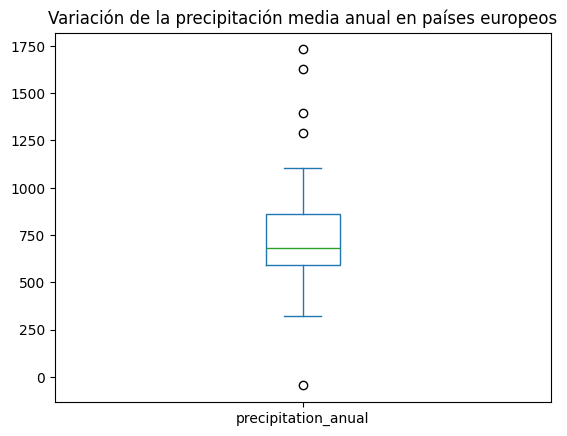

In [335]:
import matplotlib.pyplot as plt

DF['precipitation_anual'].plot(kind='box')
plt.title('Variación de la precipitación media anual en países europeos')
plt.show()

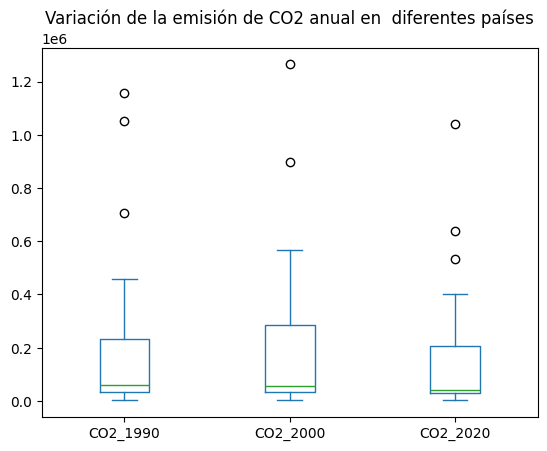

In [343]:
DF[['CO2_1990','CO2_2000','CO2_2020']].plot(kind='box')
plt.title('Variación de la emisión de CO2 anual en  diferentes países')
plt.show()

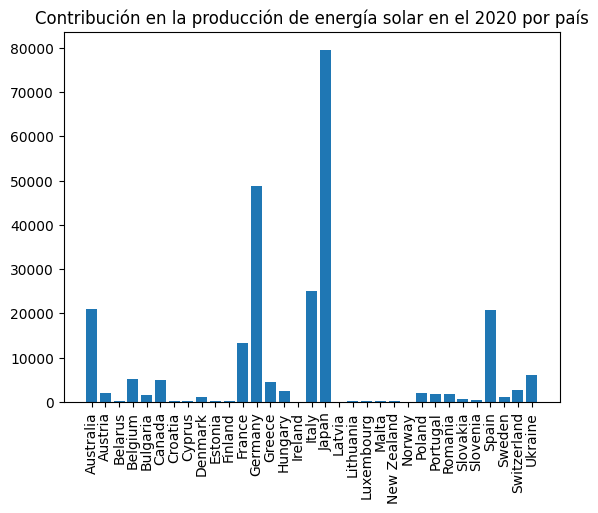

In [341]:
plt.bar(DF['Country'], DF['solar_energy_anual'])
plt.xticks(rotation=90)
plt.title('Contribución en la producción de energía solar en el 2020 por país')
plt.show()

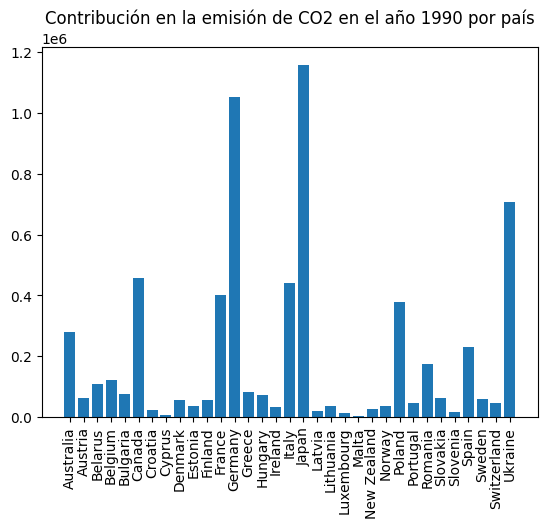

In [342]:
plt.bar(DF['Country'], DF['CO2_1990'])
plt.xticks(rotation=90)
plt.title('Contribución en la emisión de CO2 en el año 1990 por país')
plt.show()